## Logisitc Regression, KNN and PCA using Python

The document explains basic classification machine learning algorithms and how they can be coupled with regularization and cross validation 

### Logistic Regression

Details on intuition behind logistic regression can be found [here](http://www.holehouse.org/mlclass/06_Logistic_Regression.html)

We'll use a dataset of heights and weights of males and females to hone our understanding of classifiers. We load the data into a dataframe and plot it.

In [81]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import warnings 
warnings.simplefilter('ignore')

In [2]:
dflog=pd.read_csv("data/01_heights_weights_genders.csv")
dflog.head()

Gender     Height      Weight
0   Male  73.847017  241.893563
1   Male  68.781904  162.310473
2   Male  74.110105  212.740856
3   Male  71.730978  220.042470
4   Male  69.881796  206.349801

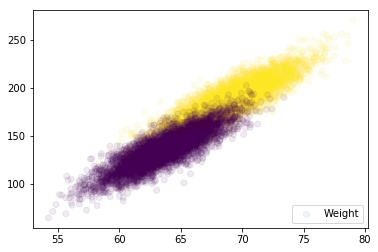

In [22]:
plt.scatter(dflog.Height, dflog.Weight,  c=[i for i in dflog.Gender=="Male"], alpha=0.08);
plt.legend(loc ="lower right")
plt.legend?

In [50]:
# importing modules for cross validation
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score

def cv_score(clf,x,y, score_func = accuracy_score):
    result =0
    nfold =5
    for train, test in KFold(nfold).split(range(y.size)):
        clf.fit(x[train], y[train])
        result += score_func(clf.predict(x[test]), y[test])
    return result/nfold
    

In [25]:
from sklearn.model_selection import train_test_split

In [40]:
Xlr, Xtestlr, ylr, ytestlr= train_test_split(dflog[['Height', 'Weight']].values, (dflog.Gender=='Male').values)

In [54]:
## Grid of parameters to search over
Cs = [0.001, 0.1, 1, 10, 100]

from sklearn.linear_model import LogisticRegression
max_score = 0

for c in Cs:
    clf = LogisticRegression(C=c)
    score = cv_score(clf, Xlr, ylr)
    
    if score >max_score:
        max_score= score
        best_C = c
        
print (best_C, max_score)


0.001 0.9198666666666668


In [56]:
## now training entire training set

clfl = LogisticRegression(C= best_C)
clfl.fit(Xlr,ylr)

accuracy_score(clfl.predict(Xtestlr), ytestlr)

0.9168

### Using GridSearchCV

In [59]:
from sklearn.model_selection import GridSearchCV

In [74]:
clfl2 = LogisticRegression()
parameters = {"C": [0.0001, 0.001, 0.1, 1, 10, 100]}
fitmodel = GridSearchCV(clfl2, param_grid=parameters, cv=5, scoring="accuracy")
fitmodel.fit(Xlr, ylr)
pd.DataFrame(fitmodel.cv_results_)

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_C  \
0       0.005205      0.000733         0.000762        0.000361  0.0001   
1       0.005455      0.000729         0.000455        0.000097   0.001   
2       0.004949      0.000654         0.000471        0.000142     0.1   
3       0.004378      0.000054         0.000383        0.000052       1   
4       0.004422      0.000046         0.000357        0.000017      10   
5       0.004407      0.000042         0.000348        0.000004     100   

          params  split0_test_score  split1_test_score  split2_test_score  \
0  {'C': 0.0001}           0.916722           0.927333           0.922000   
1   {'C': 0.001}           0.918055           0.927333           0.925333   
2     {'C': 0.1}           0.918721           0.927333           0.925333   
3       {'C': 1}           0.918721           0.927333           0.925333   
4      {'C': 10}           0.918721           0.927333           0.925333   
5     {'C': 100}           0.918721           0.927333           0.925333   

   split3_test_score  ...  mean_test_score  std_test_score  rank_test_score  \
0           0.917333  ...         0.918267        0.006419                6   
1           0.918000  ...         0.919733        0.006177                1   
2           0.917333  ...         0.919600        0.006406                2   
3           0.917333  ...         0.919600        0.006406                2   
4           0.917333  ...         0.919600        0.006406                2   
5           0.917333  ...         0.919600        0.006406                2   

   split0_train_score  split1_train_score  split2_train_score  \
0            0.918986            0.916833            0.917667   
1            0.919820            0.918500            0.919167   
2            0.920153            0.918333            0.918500   
3            0.920153            0.918167            0.918500   
4            0.920153            0.918167            0.918500   
5            0.920153            0.918167            0.918500   

   split3_train_score  split4_train_score  mean_train_score  std_train_score  
0            0.919000            0.921346          0.918767         0.001530  
1            0.921167            0.922013          0.920133         0.001289  
2            0.920500            0.922013          0.919900         0.001364  
3            0.920500            0.922013          0.919867         0.001403  
4            0.920500            0.922013          0.919867         0.001403  
5            0.920500            0.922013          0.919867         0.001403  

[6 rows x 21 columns]

In [76]:
fitmodel.best_estimator_, fitmodel.best_params_, fitmodel.best_score_

(LogisticRegression(C=0.001, class_weight=None, dual=False, fit_intercept=True,
           intercept_scaling=1, max_iter=100, multi_class='warn',
           n_jobs=None, penalty='l2', random_state=None, solver='warn',
           tol=0.0001, verbose=0, warm_start=False),
 {'C': 0.001},
 0.9197333333333333)

In [79]:
clfl2 = LogisticRegression(C= fitmodel.best_params_['C'] )
clfl2.fit(Xlr, ylr)
accuracy_score(clfl2.predict(Xtestlr), ytestlr)

0.9168

### Principal component Analysis(PCA) using The ATM Camera example

You are tasked whith making a smart ATM camera which can distinguish between dollar notes and checks. You want to make sure that dollars are not classified as checks, and that checks are not classified as dollars.

You are given a set of 87 images of checks and dollars, each of which have been scaled to 322 X 137 pixels, and where each pixel has 3 color channels.

In [82]:
data=np.load("data/imag.pix.npy")
y=np.load("data/imag.lbl.npy")
STANDARD_SIZE = (322, 137)#standardized pixels in image.
data.shape, y.shape

((87, 132342), (87,))

In [85]:
def get_image(mat):
    size = STANDARD_SIZE[0]*STANDARD_SIZE[1]*3
    r,g,b = mat[0:size:3], mat[1:size:3],mat[2:size:3]
    rgbArray = np.zeros((STANDARD_SIZE[1],STANDARD_SIZE[0], 3), 'uint8')#3 channels
    rgbArray[..., 0] = r.reshape((STANDARD_SIZE[1], STANDARD_SIZE[0]))
    rgbArray[..., 1] = b.reshape((STANDARD_SIZE[1], STANDARD_SIZE[0]))
    rgbArray[..., 2] = g.reshape((STANDARD_SIZE[1], STANDARD_SIZE[0]))
    return rgbArray

def display_image(mat):
    
        plt.imshow(get_image(mat))
        plt.xticks([])
        plt.yticks([])

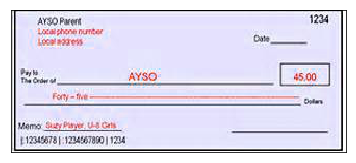

In [86]:
display_image(data[5])

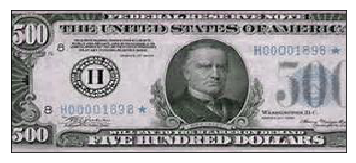

In [87]:
display_image(data[50])

The first thing that you notice is that you have many many features: to be precise, $322 x 137 x 3 = 136452$ of them. This is a lot of features! Having too many features can lead to overfitting.

You have seem this before! Remember when we did the polynomial regression? When we tried to find fits in $\hyp_1$, there were two features, the constant, and $x$. In $\hyp_2$, there are 3: the constant, $x$, and $x^2$. When we get to $\hyp_{20}$, there are 21: the constant, and 20 powers of x. And then we saw how regularization tried to eliminate some of these powers by sending their co-efficients in the polynomial very close to 0, thus reducing the number of features we had.

Another way to look at this problem is the following: we have 85 data points, but 136452 features; that is, way more features than data points. Thus there is a high chance that a few attributes will correlate with $y$ purely coincidentally!
[^Having lots of images, or "big-data" helps in combatting overfitting!]

We need to do something similar to what happened in the regularized regression here! We will engage in some *a-priori* feature selection that will reduce the dimensionality of the problem. The idea we'll use here is something called **Principal Components Analysis**, or PCA.

PCA is an unsupervized learning technique. The basic idea behind PCA is to rotate the co-ordinate axes of the feature space. We first find the direction in which the data varies the most. We set up one co-ordinate axes along this direction, which is called the first principal component. We then look for a perpendicular direction in which the data varies the second most. This is the second principal component. The diagram illustrates this process. There are as many principal components as the feature dimension: all we have done is a rotation.

![pcanim](images/pcanim.gif)

(diagram taken from http://stats.stackexchange.com/questions/2691/making-sense-of-principal-component-analysis-eigenvectors-eigenvalues which also has nice discussions)

How does this then achieve feature selection? We decide on a threshold of variation; once the variation in a particular direction falls below a certain number, we get rid of all the co-ordinate axes after that principal component. For example, if the variation falls below 10% after the third axes, and we decide that 10% is an acceptable cutoff, we remove all domensions from the fourth dimension onwards. In other words, we took our higher dimensional problem and projected it onto a 3 dimensional **subspace**.

We do not have to do this dimensionality reduction unsupervized. Indeed, you will see some supervized dimensionality reduction in the homework.

These two ideas illustrate one of the most important reasons that learning is even feasible: we believe that **most datasets, in either their unsupervized form $\{\v{x\}}$, or their supervized form $\{y, \v{x}\}$, live on a lower dimensional subspace**. If we can find this subspace, we can then hope to find a methodd which rerpectively separates or fits the data.

Here we'll continue to focus on PCA. We'll reduce our dimensionality from 136452 to 60. We choose 60 as a large apriori number: we dont know if the variation in the data will have gone below a reasonable threshold by then. Notice that we use `fit_transform` in the `sklearn` API which takes the original 87 rows x 136452 columns dimensional data `data` and transforms it to a 87 x 90 data matrix `X`.

In [92]:
from sklearn.decomposition import PCA
pca = PCA(n_components= 60)
X = pca.fit_transform(data)

In [96]:
pca.explained_variance_ratio_.sum()

0.9424564186633992

So about 94% of the variance is explained by 60 components.

Now individual contribution to this explained variance can be calulated as follows. 



In [98]:
pca.explained_variance_ratio_*100

array([35.92596698,  6.29318801,  4.10778347,  3.11950952,  2.81695972,
        2.28831619,  2.10127947,  1.87404974,  1.73264634,  1.53023768,
        1.4215966 ,  1.31839353,  1.24701428,  1.16381793,  1.09958225,
        1.06073059,  1.00742874,  0.98023664,  0.96055829,  0.91534716,
        0.90185179,  0.8521109 ,  0.83673939,  0.79691137,  0.75484953,
        0.72502993,  0.7081727 ,  0.67965744,  0.66090631,  0.64752871,
        0.62726239,  0.59451116,  0.58281004,  0.57443775,  0.57238886,
        0.5524362 ,  0.53841929,  0.53326875,  0.51651915,  0.49306629,
        0.48559971,  0.47663127,  0.47251674,  0.45534418,  0.44372839,
        0.43971119,  0.43348433,  0.4276221 ,  0.41980858,  0.40803757,
        0.40506604,  0.38925515,  0.38754537,  0.38244483,  0.37867842,
        0.35886621,  0.35755598,  0.34334836,  0.33523229,  0.33164407])

In [99]:
df = pd.DataFrame({"y":y, "label":np.where(y==1, "check", "dollar")})

In [104]:
for i in range(pca.explained_variance_ratio_.shape[0]):
    df["pc%i" % (i+1)] = X[:,i]
df.head()

y  label           pc1          pc2          pc3          pc4          pc5  \
0  1  check -22536.362571 -2428.343896 -2133.777566  -328.318818 -1065.237171   
1  1  check -22226.658684  -709.255949  -288.828621 -1300.629907  -792.090609   
2  1  check -17364.260784 -4252.026706   793.805696 -1362.057903  -374.226898   
3  1  check -22847.256200  -900.591072   577.214895  -180.308540  -733.051105   
4  1  check -15868.672595  3259.490919   506.800456  -919.635167  2166.556600   

           pc6          pc7          pc8  ...         pc51         pc52  \
0    79.803960  -424.961326   622.498672  ...  -487.708464   115.092159   
1   217.471343  1076.885488 -2115.126201  ...  -469.086985  -339.674117   
2  3142.056124  2514.319479  1443.874820  ... -1865.651256 -1669.447540   
3  -108.043798  1441.605846 -1069.462047  ...   200.470560   529.516268   
4  -981.629877 -1669.798805  -391.323886  ... -1138.424093 -3002.408654   

         pc53         pc54         pc55         pc56         pc57  \
0  282.442012  -180.111950  -144.166821   361.379079  -212.539561   
1  -39.858253   299.859584   523.956578   249.381954  -208.560977   
2  935.622159 -1851.386305 -1112.785304   148.657062 -2414.615394   
3  225.829569  -474.924850    77.394058   208.359926   784.785770   
4  114.251406   271.319721  3223.926868 -1592.013017  2304.340996   

          pc58         pc59         pc60  
0  -159.480154   203.367232    83.313149  
1    28.472297    23.873438    -1.733832  
2 -1385.192214   669.329335  -995.676371  
3  -225.559984  -533.969711  -401.301494  
4 -1989.579949  1384.290447  2112.943963  

[5 rows x 62 columns]

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


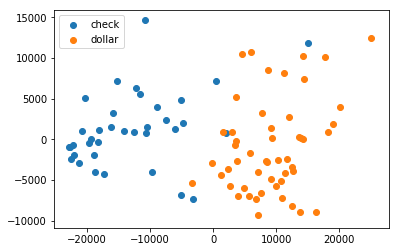

In [108]:
import seaborn as sns
c0=sns.color_palette()[0]
c1=sns.color_palette()[1]
colors = [c0, c1]
for label, color in zip(df['label'].unique(), colors):
    mask = df['label']==label
    plt.scatter(df[mask]['pc1'], df[mask]['pc2'], c=color, label=label)
plt.legend()

**After preprocessing data with PCA we can reduce multiple features to  manageable number of features(called components in case of PCAs) --> The traditional 
ML algorithms like Linear regression, Logistic Regression can be used for learning purposes**

Details on steps can be found here at [GeeksforGeeks](https://towardsdatascience.com/pca-using-python-scikit-learn-e653f8989e60) and [TowardsDataSCience blog](https://www.geeksforgeeks.org/principal-component-analysis-with-python/)

Details on intuition can be found [here](http://www.holehouse.org/mlclass/14_Dimensionality_Reduction.html)

### Classifying in a reduced feature space with kNN

Implicit in the notion of classification, is the idea that samples close to each other in feature-space share a label. kNN is a very simple algorithm to diretly use this idea to do classification. The basic notion is this: if a lot of samples in some area of the feature space belong to one class as compared to the other, we'll label that part of the feature space as "belonging" to that class. This process will then classify the feature space into class-based regions. Then, given the point in feature space, we find which region its in and thus its class. 

The way kNN does this is to ask for the k nearest neighbors in the training set of the new sample. To answer this question, one must define a distance in the feature space (Note that this distance is different from the error or risk measures we have seen earlier). This distance is typically defined as the **Euclidean distance**, the sum of the square of the difference of each feature value between any two samples.

$$D(s_1,s_2) = \sum_f (x_{f1} - x_{f2})^2.$$

Once we have a distance measure, we can sort the distances from the current sample. Then we choose the $k$ closest ones in the training set, where $k$ is an odd number (to break ties) like 1,3,5,...19,. We now see how many of these $k$ "nearest neighbors" belong to one class or the other, and choose the majority class amongst those neighbors as our sample's class.

The training process thus simply consists of memorizing the data, perhaps using a database to aid in the fast lookup of the $k$ nearest training set neighbors of any point in feature space. Notice that this process divides feature space into regions of one class or the other, since one can simply ask what the $k$ nearest neighbors in the training set are of any given point in feature space. Also notice that since classification happens via a majority "voting" scheme, we also know the probability that a point in feature space belongs to a class, as estimated by the fraction of $k$ nearest neighbors to that point in the desired class.

In [122]:
from matplotlib.colors import ListedColormap
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])
cm = plt.cm.RdBu
cm_bright = ListedColormap(['#FF0000', '#0000FF'])

def points_plot(ax, Xtr, Xte, ytr, yte, clf, mesh=True, colorscale=cmap_light, cdiscrete=cmap_bold, alpha=0.1, psize=10, zfunc=False, predicted=False):
    h = .02
    X=np.concatenate((Xtr, Xte))
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                         np.linspace(y_min, y_max, 100))

    #plt.figure(figsize=(10,6))
    if zfunc:
        p0 = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 0]
        p1 = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
        Z=zfunc(p0, p1)
    else:
        Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    ZZ = Z.reshape(xx.shape)
    if mesh:
        plt.pcolormesh(xx, yy, ZZ, cmap=cmap_light, alpha=alpha, axes=ax)
    if predicted:
        showtr = clf.predict(Xtr)
        showte = clf.predict(Xte)
    else:
        showtr = ytr
        showte = yte
    ax.scatter(Xtr[:, 0], Xtr[:, 1], c=showtr-1, cmap=cmap_bold, s=psize, alpha=alpha,edgecolor="k")
    # and testing points
    ax.scatter(Xte[:, 0], Xte[:, 1], c=showte-1, cmap=cmap_bold, alpha=alpha, marker="s", s=psize+10)
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    return ax,xx,yy

In [121]:
from sklearn.neighbors import KNeighborsClassifier

ys=df['y'].astype(int).values
subdf=df[['pc1','pc2']]
subdfstd=(subdf - subdf.mean())/subdf.std()
Xs=subdfstd.values
def classify(X,y, nbrs, plotit=True, train_size=0.6):
    Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, train_size=train_size)
    clf= KNeighborsClassifier(nbrs)
    clf=clf.fit(Xtrain, ytrain)
    #in sklearn accuracy can be found by using "score". It predicts and then gets the accuracy
    training_accuracy = clf.score(Xtrain, ytrain)
    test_accuracy = clf.score(Xtest, ytest)
    Xall=np.concatenate((Xtrain, Xtest))
    if plotit:
        print ("Accuracy on training data: %0.2f" % (training_accuracy))
        print ("Accuracy on test data:     %0.2f" % (test_accuracy))
        plt.figure()
        ax=plt.gca()
        points_plot(ax, Xtrain, Xtest, ytrain, ytest, clf, alpha=0.3, psize=20)
    return nbrs, training_accuracy, test_accuracy

Accuracy on training data: 1.00
Accuracy on test data:     0.91


(1, 1.0, 0.9142857142857143)

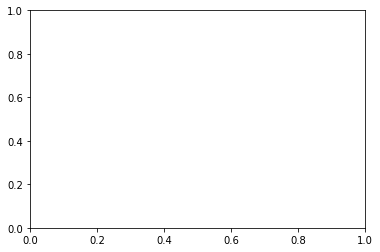

In [123]:
classify(Xs,ys,1)

### Generic cheat code for ML using Crosss validation

In [125]:
def cv_optimize(clf, parameters, Xtrain, ytrain, n_folds=5):
    gs = GridSearchCV(clf, param_grid=parameters, cv=n_folds)
    gs.fit(Xtrain, ytrain)
    print ("BEST PARAMS", gs.best_params_)
    best = gs.best_estimator_
    return best

In [127]:

def do_classify(clf, parameters, indf, featurenames, targetname, target1val, standardize=False, train_size=0.8):
    subdf=indf[featurenames]
    if standardize:
        subdfstd=(subdf - subdf.mean())/subdf.std()
    else:
        subdfstd=subdf
    X=subdfstd.values
    y=(indf[targetname].values==target1val)*1
    Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, train_size=train_size)
    clf = cv_optimize(clf, parameters, Xtrain, ytrain)
    clf=clf.fit(Xtrain, ytrain)
    training_accuracy = clf.score(Xtrain, ytrain)
    test_accuracy = clf.score(Xtest, ytest)
    print ("Accuracy on training data: %0.2f" % (training_accuracy))
    print ( "Accuracy on test data:     %0.2f" % (test_accuracy))
    return clf, Xtrain, ytrain, Xtest, ytest

In [128]:
bestcv, Xtrain, ytrain, Xtest, ytest = do_classify(KNeighborsClassifier(), {"n_neighbors": range(1,40,2)}, df, ['pc1','pc2'], 'label', 'check' )

BEST PARAMS {'n_neighbors': 21}
Accuracy on training data: 0.94
Accuracy on test data:     0.94


In [129]:
from sklearn.metrics import confusion_matrix, classification_report
confusion_matrix(ytest, bestcv.predict(Xtest), )

array([[11,  0],
       [ 1,  6]])